<a href="https://colab.research.google.com/github/karabomaboka/60DaysDailyCoding_Challenge/blob/master/Hack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#import dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
#convert excel primary data to csv file
data_xls = pd.read_excel('03 - Environmental Scan 1.xlsx', index_col=None)
data_xls.to_csv('survey.csv', encoding='utf-8')

In [0]:
#read the csv file
original_data=pd.read_csv('survey.csv')

In [83]:
#view the first five data
original_data.head()

,Unnamed: 0,QuesionnaireNo,Expenditure,Household_Income,Province,Municipality,Area,UrbanPeriUrbanRural,@1.DEMOGRAPHICS,Q1.WhatisyourGender,Q2.Inwhatyearwereyouborn,Age,Q3.Populationgroupchooseonlyone,Q4.FirstLanguagechooseonlyone,Q5.ProvinceofResidenceinSouthAfricachooseonlyone,Q6.LocalMunicipality,Q7.Whichofthefollowingwouldyouconsidertobeapplicabletotheareawhe,Q8.HighestEducationMarkonlyoneoval,Q9.Ifyouselectedanyofthefollowingcategoriesasyourhighesteducatio,Q10.WhatisyourcurrentemploymentstatusMarkonlyoneoval,Q11.IfyouselectedUnemployedaboveForhowlonghaveyoubeenunemployed,Q12.MaritalStatus,Q13.NumberofDependents,Q14.Doyouhaveapersonalemailaccount,Q15.Doyouhaveabankaccount,Q16.Whatisthesourceofyourpersonalincome,Q18.WhichMobileNetworkdoyouuseMTN,VODACOM,CELLC,TELKOMMOBILE,OTHER,Q19.Estimatehowmuchdoyouspendonmobiledatapermonth,Q20.AreyouamemberofaStokvel,Q21.Areyouamemberofacooperative,Q22.Doyougrowyourownfood,Q23.Maywecontactyouagaininfuturee.gtoparticipateinotherresearchs,@2.OWNERSHIP,Q1.OwnershipDevicesDoyouownanyofthefollowingFeaturePhone,SmartPhone,Tablet,...,Treasury,Otherspecify_H,Q3.WhichofthefollowingserviceshaveyoucompletedonlineAppliedforag,Logaqueryregardinggovernmentservice,Payforaservicee.g.Municipalbills,OtherSpecify_I,Q4.Howoftendoyoucompletetheseservicesonline,Q5.Doyouhaveanaccountonanyofthefollowingsocialnetworkingsites.Tw,Facebook_B,Instagram_A,Otherspecify_J,Q6.Howoftendoyouusethegovernmentpageaccountonsocialnetworkingsit,Q7.HaveyouperformedanyofthefollowingonGovernmentspageaccountonso,Q8.Howoftendoyousuccessfullycompletewhatyouhavetriedtodoonagover,Q9.Howoftendogovernmentofficialsdepartmentsthatyouinteractwithon,Q10.Howoftenhaveyoubeensatisfiedwiththeresponsesyoureceivedfromg,Q11.Doyoutrustgovernmentwebsitesorapps,Q12.Doyoubelievegovernmentwebsitesappsshouldbeavailableinyourhom,@14.POVERTYANDSOCIALINCLUSION,Q1.Howmanypeopleliveinyourhousehold,Q3.HealthaHasanychildundertheageof5inyourhouseholddiedinthepast1,Q4.EducationDimensionaHaveanymembersofyourhouseholdaged15orolder,Q5.Isthereanyschoolagedchildaged7to15inyourhouseholdthatiscurren,V274,bDoesyourhouseholduseparaffinwoodcoaldungothernonefprhearing,cDoesyourhouseholduseparaffinwoodcoaldungothernoneforcooking,dDoesyourhouseholdhavepipedwaterindwellingoronstand,eDoesyourhouseholdhaveaflushtoilet,fIsyourcurrentdwellingplaceanyofthefollowinganinformalshacktradi,gDoesyourhouseholdownmorethanoneofthefollowingradiotelevisiontel,hDoesyourhouseholdownacar,Q7.Arealladultsaged15to64inthehouseholdunemployed,GENERAL,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,Age_Bins,Employment_Bins
0,0,2618,600.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1988.0,31.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,2.0,1,1,1,1,0,0,0,0.0,2.0,0,0,1,0.0,NaN,1,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,2.0,0,0,1,1,1,1,0,0,0,1,0,1,2.333333,5.000000,5.0,1.666667,2.714286,4.2,1.0,0
1,1,2556,1200.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1993.0,26.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,46.0,3.0,2.0,0,1,2,0,1,0,0,0.0,2.0,1,0,0,1.0,NaN,0,1,0,...,0,1.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,6.0,0,1,0,1,1,1,1,1,0,1,1,1,1.555556,2.222222,1.7,1.000000,1.714286,1.4,1.0,0
2,2,2504,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,12.0,3.0,3.0,1,1,5,1,0,0,0,0.0,1.0,0,0,1,0.0,NaN,0,1,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,5,NaN,5,5,5,0.0,0.0,NaN,4.0,1,1,0,0,0,0,0,0,0,0,0,0,3.000000,3.000000,1.0,1.000000,1.000000,1.0,1.0,0
3,3,2574,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,1.0,0,1,1,0,1,0,0,0.0,1.0,0,0,0,1.0,NaN,1,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,4,NaN,5,5,4,0.0,1.0,NaN,3.0,0,1,0,0,0,0,0,1,1,1,1,1,1.111111,3.777778,4.0,4.000000,2.571429,4.8,1.0,0
4,4,2587,1500.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1987.0,32.0,1,

# New Section

In [84]:
#view the last five
original_data.tail()

,Unnamed: 0,QuesionnaireNo,Expenditure,Household_Income,Province,Municipality,Area,UrbanPeriUrbanRural,@1.DEMOGRAPHICS,Q1.WhatisyourGender,Q2.Inwhatyearwereyouborn,Age,Q3.Populationgroupchooseonlyone,Q4.FirstLanguagechooseonlyone,Q5.ProvinceofResidenceinSouthAfricachooseonlyone,Q6.LocalMunicipality,Q7.Whichofthefollowingwouldyouconsidertobeapplicabletotheareawhe,Q8.HighestEducationMarkonlyoneoval,Q9.Ifyouselectedanyofthefollowingcategoriesasyourhighesteducatio,Q10.WhatisyourcurrentemploymentstatusMarkonlyoneoval,Q11.IfyouselectedUnemployedaboveForhowlonghaveyoubeenunemployed,Q12.MaritalStatus,Q13.NumberofDependents,Q14.Doyouhaveapersonalemailaccount,Q15.Doyouhaveabankaccount,Q16.Whatisthesourceofyourpersonalincome,Q18.WhichMobileNetworkdoyouuseMTN,VODACOM,CELLC,TELKOMMOBILE,OTHER,Q19.Estimatehowmuchdoyouspendonmobiledatapermonth,Q20.AreyouamemberofaStokvel,Q21.Areyouamemberofacooperative,Q22.Doyougrowyourownfood,Q23.Maywecontactyouagaininfuturee.gtoparticipateinotherresearchs,@2.OWNERSHIP,Q1.OwnershipDevicesDoyouownanyofthefollowingFeaturePhone,SmartPhone,Tablet,...,Treasury,Otherspecify_H,Q3.WhichofthefollowingserviceshaveyoucompletedonlineAppliedforag,Logaqueryregardinggovernmentservice,Payforaservicee.g.Municipalbills,OtherSpecify_I,Q4.Howoftendoyoucompletetheseservicesonline,Q5.Doyouhaveanaccountonanyofthefollowingsocialnetworkingsites.Tw,Facebook_B,Instagram_A,Otherspecify_J,Q6.Howoftendoyouusethegovernmentpageaccountonsocialnetworkingsit,Q7.HaveyouperformedanyofthefollowingonGovernmentspageaccountonso,Q8.Howoftendoyousuccessfullycompletewhatyouhavetriedtodoonagover,Q9.Howoftendogovernmentofficialsdepartmentsthatyouinteractwithon,Q10.Howoftenhaveyoubeensatisfiedwiththeresponsesyoureceivedfromg,Q11.Doyoutrustgovernmentwebsitesorapps,Q12.Doyoubelievegovernmentwebsitesappsshouldbeavailableinyourhom,@14.POVERTYANDSOCIALINCLUSION,Q1.Howmanypeopleliveinyourhousehold,Q3.HealthaHasanychildundertheageof5inyourhouseholddiedinthepast1,Q4.EducationDimensionaHaveanymembersofyourhouseholdaged15orolder,Q5.Isthereanyschoolagedchildaged7to15inyourhouseholdthatiscurren,V274,bDoesyourhouseholduseparaffinwoodcoaldungothernonefprhearing,cDoesyourhouseholduseparaffinwoodcoaldungothernoneforcooking,dDoesyourhouseholdhavepipedwaterindwellingoronstand,eDoesyourhouseholdhaveaflushtoilet,fIsyourcurrentdwellingplaceanyofthefollowinganinformalshacktradi,gDoesyourhouseholdownmorethanoneofthefollowingradiotelevisiontel,hDoesyourhouseholdownacar,Q7.Arealladultsaged15to64inthehouseholdunemployed,GENERAL,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,Age_Bins,Employment_Bins
2995,2995,2288,1500.0,1,Western Cape,City Of Cape Town,Cape Town,Urban,NaN,1,2002.0,17.0,1,4.0,9,Cape Town Municipality,1,7,1.0,6,0.0,3.0,0.0,1,0,1,0,0,0,1,0.0,4.0,0,0,0,1.0,NaN,0,1,0,...,0,0.0,0.0,0,0,0.0,5.0,1,0,0,0.0,5,NaN,5,5,5,0.0,1.0,NaN,3.0,0,0,0,0,0,0,1,1,0,1,1,0,2.333333,4.000000,3.7,3.000000,3.285714,3.8,0.0,2
2996,2996,2159,NaN,7,Western Cape,City Of Cape Town,Cape Town,Urban,NaN,2,1995.0,24.0,5,13.0,9,Cape Town Municipality,1,7,1.0,6,0.0,3.0,1.0,0,0,1,1,0,1,0,0.0,1.0,0,0,0,0.0,NaN,0,1,0,...,0,0.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,0.0,1.0,NaN,9.0,0,0,0,0,0,0,0,1,1,0,1,1,3.000000,4.000000,3.9,2.666667,3.142857,3.4,1.0,2
2997,2997,2485,1500.0,1,Western Cape,City Of Cape Town,Cape Town,Urban,NaN,1,1996.0,23.0,1,13.0,9,Cape Town Municipality,1,7,0.0,6,0.0,3.0,0.0,1,1,5,1,0,1,0,0.0,3.0,0,0,0,1.0,NaN,0,1,0,...,0,0.0,0.0,0,0,0.0,3.0,0,1,1,0.0,1,3.0,5,5,5,0.0,0.0,NaN,4.0,0,1,0,0,0,0,0,1,0,1,1,0,1.777778,2.777778,1.8,2.000000,2.714286,2.2,1.0,2
2998,2998,2091,2000.0,2,Western Cape,Drakenstein,Paarl,Rural,NaN,1,1953.0,66.0,2,1.0,9,Drakenstein Municipality,3,1,NaN,7,120.0,1.0,4.0,0,1,2,0,1,0,0,0.0,6.0,1,0,0,0.0,NaN,1,0,0,...,0,0.0,0.0,0,0,0.0,2.0,1,1,1,0.0,1,1.0,2,1,1,1.0,1.0,NaN,7.0,0,1,0,0,0,0,1,1,1,1,1,0,1.000000,1.000000,1.3,1.000000,1.285714,1.0,3.0,3
2999,2999,2491,1000.0,1,Western Cape,City Of Cape Town,Cape Town,Urban,NaN,1,1999.0,20.0,1,4.0,

In [85]:
#checking the number of rows and columns in our data
original_data.shape

(3000, 290)

In [0]:
#Drop the Unnamed column
original_data.drop(original_data.columns[[0]], axis=1, inplace=True)

In [87]:
original_data.head()

,QuesionnaireNo,Expenditure,Household_Income,Province,Municipality,Area,UrbanPeriUrbanRural,@1.DEMOGRAPHICS,Q1.WhatisyourGender,Q2.Inwhatyearwereyouborn,Age,Q3.Populationgroupchooseonlyone,Q4.FirstLanguagechooseonlyone,Q5.ProvinceofResidenceinSouthAfricachooseonlyone,Q6.LocalMunicipality,Q7.Whichofthefollowingwouldyouconsidertobeapplicabletotheareawhe,Q8.HighestEducationMarkonlyoneoval,Q9.Ifyouselectedanyofthefollowingcategoriesasyourhighesteducatio,Q10.WhatisyourcurrentemploymentstatusMarkonlyoneoval,Q11.IfyouselectedUnemployedaboveForhowlonghaveyoubeenunemployed,Q12.MaritalStatus,Q13.NumberofDependents,Q14.Doyouhaveapersonalemailaccount,Q15.Doyouhaveabankaccount,Q16.Whatisthesourceofyourpersonalincome,Q18.WhichMobileNetworkdoyouuseMTN,VODACOM,CELLC,TELKOMMOBILE,OTHER,Q19.Estimatehowmuchdoyouspendonmobiledatapermonth,Q20.AreyouamemberofaStokvel,Q21.Areyouamemberofacooperative,Q22.Doyougrowyourownfood,Q23.Maywecontactyouagaininfuturee.gtoparticipateinotherresearchs,@2.OWNERSHIP,Q1.OwnershipDevicesDoyouownanyofthefollowingFeaturePhone,SmartPhone,Tablet,Laptop,...,Treasury,Otherspecify_H,Q3.WhichofthefollowingserviceshaveyoucompletedonlineAppliedforag,Logaqueryregardinggovernmentservice,Payforaservicee.g.Municipalbills,OtherSpecify_I,Q4.Howoftendoyoucompletetheseservicesonline,Q5.Doyouhaveanaccountonanyofthefollowingsocialnetworkingsites.Tw,Facebook_B,Instagram_A,Otherspecify_J,Q6.Howoftendoyouusethegovernmentpageaccountonsocialnetworkingsit,Q7.HaveyouperformedanyofthefollowingonGovernmentspageaccountonso,Q8.Howoftendoyousuccessfullycompletewhatyouhavetriedtodoonagover,Q9.Howoftendogovernmentofficialsdepartmentsthatyouinteractwithon,Q10.Howoftenhaveyoubeensatisfiedwiththeresponsesyoureceivedfromg,Q11.Doyoutrustgovernmentwebsitesorapps,Q12.Doyoubelievegovernmentwebsitesappsshouldbeavailableinyourhom,@14.POVERTYANDSOCIALINCLUSION,Q1.Howmanypeopleliveinyourhousehold,Q3.HealthaHasanychildundertheageof5inyourhouseholddiedinthepast1,Q4.EducationDimensionaHaveanymembersofyourhouseholdaged15orolder,Q5.Isthereanyschoolagedchildaged7to15inyourhouseholdthatiscurren,V274,bDoesyourhouseholduseparaffinwoodcoaldungothernonefprhearing,cDoesyourhouseholduseparaffinwoodcoaldungothernoneforcooking,dDoesyourhouseholdhavepipedwaterindwellingoronstand,eDoesyourhouseholdhaveaflushtoilet,fIsyourcurrentdwellingplaceanyofthefollowinganinformalshacktradi,gDoesyourhouseholdownmorethanoneofthefollowingradiotelevisiontel,hDoesyourhouseholdownacar,Q7.Arealladultsaged15to64inthehouseholdunemployed,GENERAL,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,Age_Bins,Employment_Bins
0,2618,600.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1988.0,31.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,2.0,1,1,1,1,0,0,0,0.0,2.0,0,0,1,0.0,NaN,1,0,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,2.0,0,0,1,1,1,1,0,0,0,1,0,1,2.333333,5.000000,5.0,1.666667,2.714286,4.2,1.0,0
1,2556,1200.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1993.0,26.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,46.0,3.0,2.0,0,1,2,0,1,0,0,0.0,2.0,1,0,0,1.0,NaN,0,1,0,0,...,0,1.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,6.0,0,1,0,1,1,1,1,1,0,1,1,1,1.555556,2.222222,1.7,1.000000,1.714286,1.4,1.0,0
2,2504,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,12.0,3.0,3.0,1,1,5,1,0,0,0,0.0,1.0,0,0,1,0.0,NaN,0,1,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,5,NaN,5,5,5,0.0,0.0,NaN,4.0,1,1,0,0,0,0,0,0,0,0,0,0,3.000000,3.000000,1.0,1.000000,1.000000,1.0,1.0,0
3,2574,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,1.0,0,1,1,0,1,0,0,0.0,1.0,0,0,0,1.0,NaN,1,0,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,4,NaN,5,5,4,0.0,1.0,NaN,3.0,0,1,0,0,0,0,0,1,1,1,1,1,1.111111,3.777778,4.0,4.000000,2.571429,4.8,1.0,0
4,2587,1500.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1987.0,32.0,1,4.0,1,

In [89]:
original_data.dtypes

QuesionnaireNo                   int64
Expenditure                    float64
Household_Income                 int64
Province                        object
Municipality                    object
                                ...   
Communication_Collaboration    float64
Safety                         float64
ProblemSolving                 float64
Age_Bins                       float64
Employment_Bins                  int64
Length: 289, dtype: object

In [90]:
#Check missing values
original_data.isnull().sum()

QuesionnaireNo                   0
Expenditure                    159
Household_Income                 0
Province                         0
Municipality                     0
                              ... 
Communication_Collaboration      1
Safety                           0
ProblemSolving                   0
Age_Bins                       189
Employment_Bins                  0
Length: 289, dtype: int64

In [91]:
#statistical analysis
original_data.describe()

,QuesionnaireNo,Expenditure,Household_Income,@1.DEMOGRAPHICS,Q1.WhatisyourGender,Q2.Inwhatyearwereyouborn,Age,Q3.Populationgroupchooseonlyone,Q4.FirstLanguagechooseonlyone,Q5.ProvinceofResidenceinSouthAfricachooseonlyone,Q7.Whichofthefollowingwouldyouconsidertobeapplicabletotheareawhe,Q8.HighestEducationMarkonlyoneoval,Q9.Ifyouselectedanyofthefollowingcategoriesasyourhighesteducatio,Q10.WhatisyourcurrentemploymentstatusMarkonlyoneoval,Q11.IfyouselectedUnemployedaboveForhowlonghaveyoubeenunemployed,Q12.MaritalStatus,Q13.NumberofDependents,Q14.Doyouhaveapersonalemailaccount,Q15.Doyouhaveabankaccount,Q16.Whatisthesourceofyourpersonalincome,Q18.WhichMobileNetworkdoyouuseMTN,VODACOM,CELLC,TELKOMMOBILE,OTHER,Q19.Estimatehowmuchdoyouspendonmobiledatapermonth,Q20.AreyouamemberofaStokvel,Q21.Areyouamemberofacooperative,Q22.Doyougrowyourownfood,Q23.Maywecontactyouagaininfuturee.gtoparticipateinotherresearchs,@2.OWNERSHIP,Q1.OwnershipDevicesDoyouownanyofthefollowingFeaturePhone,SmartPhone,Tablet,Laptop,PersonalComputer,TV,Q2.HowdidyougetyourphonetabletPC,Q3.Ownership–OtherDoyouownanyofthefollowingLand,House,...,Treasury,Otherspecify_H,Q3.WhichofthefollowingserviceshaveyoucompletedonlineAppliedforag,Logaqueryregardinggovernmentservice,Payforaservicee.g.Municipalbills,OtherSpecify_I,Q4.Howoftendoyoucompletetheseservicesonline,Q5.Doyouhaveanaccountonanyofthefollowingsocialnetworkingsites.Tw,Facebook_B,Instagram_A,Otherspecify_J,Q6.Howoftendoyouusethegovernmentpageaccountonsocialnetworkingsit,Q7.HaveyouperformedanyofthefollowingonGovernmentspageaccountonso,Q8.Howoftendoyousuccessfullycompletewhatyouhavetriedtodoonagover,Q9.Howoftendogovernmentofficialsdepartmentsthatyouinteractwithon,Q10.Howoftenhaveyoubeensatisfiedwiththeresponsesyoureceivedfromg,Q11.Doyoutrustgovernmentwebsitesorapps,Q12.Doyoubelievegovernmentwebsitesappsshouldbeavailableinyourhom,@14.POVERTYANDSOCIALINCLUSION,Q1.Howmanypeopleliveinyourhousehold,Q3.HealthaHasanychildundertheageof5inyourhouseholddiedinthepast1,Q4.EducationDimensionaHaveanymembersofyourhouseholdaged15orolder,Q5.Isthereanyschoolagedchildaged7to15inyourhouseholdthatiscurren,V274,bDoesyourhouseholduseparaffinwoodcoaldungothernonefprhearing,cDoesyourhouseholduseparaffinwoodcoaldungothernoneforcooking,dDoesyourhouseholdhavepipedwaterindwellingoronstand,eDoesyourhouseholdhaveaflushtoilet,fIsyourcurrentdwellingplaceanyofthefollowinganinformalshacktradi,gDoesyourhouseholdownmorethanoneofthefollowingradiotelevisiontel,hDoesyourhouseholdownacar,Q7.Arealladultsaged15to64inthehouseholdunemployed,GENERAL,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,Age_Bins,Employment_Bins
count,3000.000000,2841.000000,3000.000000,0.0,3000.000000,2814.000000,2813.000000,3000.000000,2996.000000,3000.000000,3000.000000,3000.000000,1343.000000,3000.000000,1215.000000,2999.000000,2949.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,2999.00000,3000.000000,3000.000000,3000.000000,2997.000000,0.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,2978.000000,2999.000000,3000.000000,3000.000000,2995.000000,2998.000000,3000.000000,3000.000000,3000.000000,2964.000000,3000.000000,1065.000000,3000.000000,3000.000000,3000.000000,2957.000000,2981.000000,0.0,2959.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,2999.000000,3000.000000,3000.000000,2811.000000,3000.000000
mean,1501.350000,2245.244632,3.209333,NaN,1.500333,1987.103767,31.895841,1.293000,5.707276,5.083000,1.848000,2.713000,0.406552,3.429000,25.353086,2.602534,1.609698,0.630667,0.856333,2.547000,0.387667,0.433000,0.238333,0.166000,0.005002,3.48016,0.174667,0.086667,0.171667,0.380714,NaN,0.244000,0.863667,0.163000,0.382000,0.122333,0.681667,2.315000,0.288333,0.586333,...,0.058333,0.018805,0.294098,0

In [92]:
original_data.head()

,QuesionnaireNo,Expenditure,Household_Income,Province,Municipality,Area,UrbanPeriUrbanRural,@1.DEMOGRAPHICS,Q1.WhatisyourGender,Q2.Inwhatyearwereyouborn,Age,Q3.Populationgroupchooseonlyone,Q4.FirstLanguagechooseonlyone,Q5.ProvinceofResidenceinSouthAfricachooseonlyone,Q6.LocalMunicipality,Q7.Whichofthefollowingwouldyouconsidertobeapplicabletotheareawhe,Q8.HighestEducationMarkonlyoneoval,Q9.Ifyouselectedanyofthefollowingcategoriesasyourhighesteducatio,Q10.WhatisyourcurrentemploymentstatusMarkonlyoneoval,Q11.IfyouselectedUnemployedaboveForhowlonghaveyoubeenunemployed,Q12.MaritalStatus,Q13.NumberofDependents,Q14.Doyouhaveapersonalemailaccount,Q15.Doyouhaveabankaccount,Q16.Whatisthesourceofyourpersonalincome,Q18.WhichMobileNetworkdoyouuseMTN,VODACOM,CELLC,TELKOMMOBILE,OTHER,Q19.Estimatehowmuchdoyouspendonmobiledatapermonth,Q20.AreyouamemberofaStokvel,Q21.Areyouamemberofacooperative,Q22.Doyougrowyourownfood,Q23.Maywecontactyouagaininfuturee.gtoparticipateinotherresearchs,@2.OWNERSHIP,Q1.OwnershipDevicesDoyouownanyofthefollowingFeaturePhone,SmartPhone,Tablet,Laptop,...,Treasury,Otherspecify_H,Q3.WhichofthefollowingserviceshaveyoucompletedonlineAppliedforag,Logaqueryregardinggovernmentservice,Payforaservicee.g.Municipalbills,OtherSpecify_I,Q4.Howoftendoyoucompletetheseservicesonline,Q5.Doyouhaveanaccountonanyofthefollowingsocialnetworkingsites.Tw,Facebook_B,Instagram_A,Otherspecify_J,Q6.Howoftendoyouusethegovernmentpageaccountonsocialnetworkingsit,Q7.HaveyouperformedanyofthefollowingonGovernmentspageaccountonso,Q8.Howoftendoyousuccessfullycompletewhatyouhavetriedtodoonagover,Q9.Howoftendogovernmentofficialsdepartmentsthatyouinteractwithon,Q10.Howoftenhaveyoubeensatisfiedwiththeresponsesyoureceivedfromg,Q11.Doyoutrustgovernmentwebsitesorapps,Q12.Doyoubelievegovernmentwebsitesappsshouldbeavailableinyourhom,@14.POVERTYANDSOCIALINCLUSION,Q1.Howmanypeopleliveinyourhousehold,Q3.HealthaHasanychildundertheageof5inyourhouseholddiedinthepast1,Q4.EducationDimensionaHaveanymembersofyourhouseholdaged15orolder,Q5.Isthereanyschoolagedchildaged7to15inyourhouseholdthatiscurren,V274,bDoesyourhouseholduseparaffinwoodcoaldungothernonefprhearing,cDoesyourhouseholduseparaffinwoodcoaldungothernoneforcooking,dDoesyourhouseholdhavepipedwaterindwellingoronstand,eDoesyourhouseholdhaveaflushtoilet,fIsyourcurrentdwellingplaceanyofthefollowinganinformalshacktradi,gDoesyourhouseholdownmorethanoneofthefollowingradiotelevisiontel,hDoesyourhouseholdownacar,Q7.Arealladultsaged15to64inthehouseholdunemployed,GENERAL,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,Age_Bins,Employment_Bins
0,2618,600.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1988.0,31.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,2.0,1,1,1,1,0,0,0,0.0,2.0,0,0,1,0.0,NaN,1,0,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,2.0,0,0,1,1,1,1,0,0,0,1,0,1,2.333333,5.000000,5.0,1.666667,2.714286,4.2,1.0,0
1,2556,1200.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1993.0,26.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,46.0,3.0,2.0,0,1,2,0,1,0,0,0.0,2.0,1,0,0,1.0,NaN,0,1,0,0,...,0,1.0,0.0,0,0,0.0,5.0,0,1,0,0.0,5,NaN,5,5,5,1.0,1.0,NaN,6.0,0,1,0,1,1,1,1,1,0,1,1,1,1.555556,2.222222,1.7,1.000000,1.714286,1.4,1.0,0
2,2504,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,12.0,3.0,3.0,1,1,5,1,0,0,0,0.0,1.0,0,0,1,0.0,NaN,0,1,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,5,NaN,5,5,5,0.0,0.0,NaN,4.0,1,1,0,0,0,0,0,0,0,0,0,0,3.000000,3.000000,1.0,1.000000,1.000000,1.0,1.0,0
3,2574,1500.0,1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,1,1986.0,33.0,1,4.0,1,Sara Baartman Municipality,3,1,NaN,2,2.0,3.0,1.0,0,1,1,0,1,0,0,0.0,1.0,0,0,0,1.0,NaN,1,0,0,0,...,0,0.0,0.0,0,0,0.0,5.0,0,0,0,0.0,4,NaN,5,5,4,0.0,1.0,NaN,3.0,0,1,0,0,0,0,0,1,1,1,1,1,1.111111,3.777778,4.0,4.000000,2.571429,4.8,1.0,0
4,2587,1500.0,2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,NaN,2,1987.0,32.0,1,4.0,1,

In [0]:
#Select Important features in the dataset and define the data
featured_data=original_data[['Province','Municipality', 'Area','UrbanPeriUrbanRural','Age','Household_Income','Expenditure','ICT','InformationDataLiteracy','Communication_Collaboration','Safety','ProblemSolving']]

In [94]:
#read the first five data
featured_data.head()

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
0,Eastern Cape,Sundays River Valley,Kirkwood,Rural,31.0,1,600.0,5.000000,5.0,1.666667,2.714286,4.2
1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,26.0,2,1200.0,2.222222,1.7,1.000000,1.714286,1.4
2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,33.0,1,1500.0,3.000000,1.0,1.000000,1.000000,1.0
3,Eastern Cape,Sundays River Valley,Kirkwood,Rural,33.0,1,1500.0,3.777778,4.0,4.000000,2.571429,4.8
4,Eastern Cape,Sundays River Valley,Kirkwood,Rural,32.0,2,1500.0,4.000000,1.2,2.000000,4.428571,3.6


In [95]:
#Checking rows and columns of featured dataset
featured_data.shape

(3000, 12)

In [96]:
#checking missing values for featured data
featured_data.isnull().sum()

Province                         0
Municipality                     0
Area                             0
UrbanPeriUrbanRural              0
Age                            187
Household_Income                 0
Expenditure                    159
ICT                              0
InformationDataLiteracy          1
Communication_Collaboration      1
Safety                           0
ProblemSolving                   0
dtype: int64

In [97]:
#Total values of missing data
featured_data.isnull().sum().sum()

348

In [98]:
#replacing the missing data with median because the data is Big
median = featured_data['Age'].median()
featured_data['Age'].fillna(median, inplace=True)

median = featured_data['Expenditure'].median()
featured_data['Expenditure'].fillna(median, inplace=True)

median = featured_data['InformationDataLiteracy'].median()
featured_data['InformationDataLiteracy'].fillna(median, inplace=True)

median = featured_data['Communication_Collaboration'].median()
featured_data['Communication_Collaboration'].fillna(median, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [99]:
#confirming the replacement of missing data
featured_data.isnull().sum()

Province                       0
Municipality                   0
Area                           0
UrbanPeriUrbanRural            0
Age                            0
Household_Income               0
Expenditure                    0
ICT                            0
InformationDataLiteracy        0
Communication_Collaboration    0
Safety                         0
ProblemSolving                 0
dtype: int64

In [100]:
#statistical analysis of featured data
featured_data.describe()

,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,31.777667,3.209333,2232.246667,2.539630,2.420633,2.279111,2.410905,2.632000
std,9.590076,2.024569,1573.490011,0.929180,0.892683,0.906275,0.820951,0.909504
min,15.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,2.000000,1400.000000,2.000000,1.900000,2.000000,2.000000,2.000000
50%,30.000000,2.000000,2000.000000,2.222222,2.200000,2.000000,2.285714,2.400000
75%,37.000000,4.000000,3000.000000,3.000000,2.800000,2.666667,2.714286,3.200000
max,110.000000,7.000000,15000.000000,5.000000,5.000000,5.000000,5.000000,5.000000


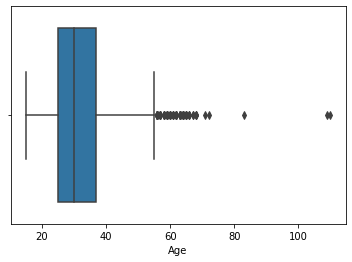

In [101]:
#detecting the outlier for age
sns.boxplot(x=featured_data['Age'])

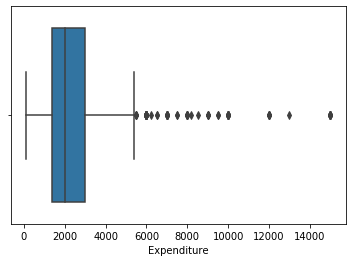

In [102]:
#detecting the outlier for expenditure
sns.boxplot(x=featured_data['Expenditure'])

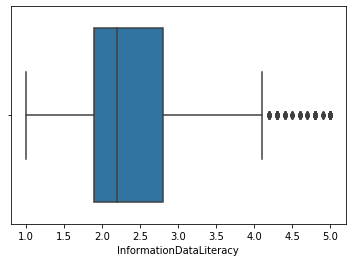

In [103]:
#detecting the outliers for information data literacy
sns.boxplot(x=featured_data['InformationDataLiteracy'])

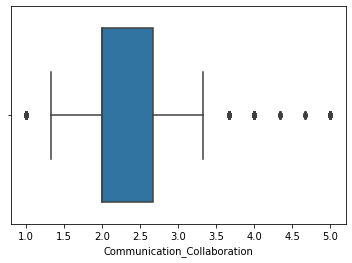

In [104]:
#detecting outlier from communication data literacy
sns.boxplot(x=featured_data['Communication_Collaboration'])

In [105]:
#Treating the outliers for age
filter=featured_data['Age'].values>60
featured_data_outlier_rem=featured_data[filter]
featured_data_outlier_rem

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
79,Eastern Cape,Sundays River Valley,Kirkwood,Rural,61.0,2,700.0,3.333333,4.0,3.000000,3.142857,4.4
127,Eastern Cape,Sundays River Valley,Kirkwood,Rural,62.0,7,1000.0,4.000000,4.2,3.333333,3.000000,3.2
243,Eastern Cape,Sundays River Valley,Kirkwood,Rural,83.0,4,2000.0,4.000000,4.8,2.000000,2.857143,4.2
244,Eastern Cape,Sundays River Valley,Kirkwood,Rural,61.0,1,6000.0,1.222222,1.5,1.000000,1.285714,1.6
246,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,64.0,3,3000.0,2.000000,2.7,2.000000,2.714286,2.6
247,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,63.0,3,3000.0,1.000000,1.0,1.000000,1.857143,3.2
405,Free State,Mangaung,Bloemfontein,Urban,63.0,2,2400.0,4.000000,4.1,4.000000,2.857143,4.2
498,Free State,Mangaung,Bloemfontein,Urban,63.0,2,1400.0,4.000000,3.9,4.000000,3.428571,3.2
513,Gauteng,City of Joburg,Alexandra,Township,68.0,5,4000.0,3.000000,1.4,1.333333,1.571429,1.6
862,Gauteng,City of Joburg,Johannesburg,Urban,109.0,7,1200.0,2.222222,2.3,1.666667,2.857143,3.4


In [106]:
#Treating the outliers for Expenditure
filter=featured_data['Expenditure'].values>6000
featured_data_outlier_rem=featured_data[filter]
featured_data_outlier_rem

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
78,Eastern Cape,Sundays River Valley,Kirkwood,Rural,48.0,6,8000.0,1.888889,1.5,2.666667,2.142857,1.6
107,Eastern Cape,Sundays River Valley,Kirkwood,Rural,44.0,2,9000.0,2.222222,2.8,2.000000,2.285714,2.0
126,Eastern Cape,Sundays River Valley,Kirkwood,Rural,44.0,6,9000.0,1.444444,1.3,2.000000,1.285714,2.6
157,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,30.0,4,9000.0,4.000000,1.0,1.333333,1.000000,1.0
220,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,38.0,6,8000.0,1.777778,1.8,1.333333,1.142857,1.8
221,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,45.0,6,12000.0,2.222222,1.8,1.666667,1.714286,1.6
235,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,30.0,7,7000.0,1.777778,2.2,1.000000,1.285714,2.6
339,Free State,Mangaung,Bloemfontein,Urban,24.0,1,8200.0,2.888889,2.5,3.000000,2.285714,3.4
501,Gauteng,City of Joburg,Alexandra,Township,27.0,2,15000.0,3.777778,1.5,2.000000,4.428571,5.0
504,Gauteng,City of Joburg,Alexandra,Township,25.0,2,15000.0,2.555556,1.9,1.333333,3.142857,3.2


In [107]:
#Treating the outliers for InformationDataLiteracy
filter=featured_data['InformationDataLiteracy'].values>4
featured_data_outlier_rem=featured_data[filter]
featured_data_outlier_rem

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
0,Eastern Cape,Sundays River Valley,Kirkwood,Rural,31.0,1,600.0,5.000000,5.0,1.666667,2.714286,4.2
30,Eastern Cape,Nelson Mandela Bay,KwaZakhele,Township,26.0,2,400.0,4.444444,4.1,4.666667,4.285714,4.4
37,Eastern Cape,Nelson Mandela Bay,KwaZakhele,Township,36.0,7,700.0,2.000000,4.1,3.333333,2.285714,3.6
40,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,31.0,2,300.0,4.333333,4.3,3.666667,4.285714,4.6
43,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,51.0,1,200.0,4.000000,4.8,2.666667,5.000000,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2694,Western Cape,City Of Cape Town,Khayelitsha,Township,30.0,2,1500.0,4.000000,4.7,4.000000,5.000000,4.2
2723,Western Cape,City Of Cape Town,Cape Town,Urban,30.0,2,600.0,5.000000,5.0,5.000000,3.857143,4.8
2730,Western Cape,City Of Cape Town,Cape Town,Urban,31.0,2,300.0,2.111111,4.4,2.000000,2.142857,2.2
2753,Western Cape,City Of Cape Town,Cape Town,Urban,40.0,2,600.0,5.000000,4.8,5.000000,5.000000,5.0


In [108]:
#Treating the outliers for Communication_Collaboration
filter=featured_data['Communication_Collaboration'].values>3.5
featured_data_outlier_rem=featured_data[filter]
featured_data_outlier_rem

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving
3,Eastern Cape,Sundays River Valley,Kirkwood,Rural,33.0,1,1500.0,3.777778,4.0,4.000000,2.571429,4.8
30,Eastern Cape,Nelson Mandela Bay,KwaZakhele,Township,26.0,2,400.0,4.444444,4.1,4.666667,4.285714,4.4
31,Eastern Cape,Nelson Mandela Bay,KwaZakhele,Township,29.0,2,500.0,4.555556,4.0,4.666667,4.571429,4.0
40,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,31.0,2,300.0,4.333333,4.3,3.666667,4.285714,4.6
44,Eastern Cape,Nelson Mandela Bay,Port Elizabeth,Urban,49.0,2,1000.0,4.222222,4.2,4.000000,4.142857,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,Western Cape,City Of Cape Town,Cape Town,Urban,37.0,7,2000.0,4.000000,3.0,3.666667,2.285714,3.8
2823,Western Cape,City Of Cape Town,Cape Town,Urban,41.0,7,2000.0,3.555556,3.6,3.666667,3.285714,3.6
2824,Western Cape,City Of Cape Town,Cape Town,Urban,41.0,2,2000.0,5.000000,2.9,5.000000,4.142857,2.8
2922,Western Cape,City Of Cape Town,Cape Town,Urban,30.0,3,2000.0,4.333333,2.8,5.000000,4.285714,4.2


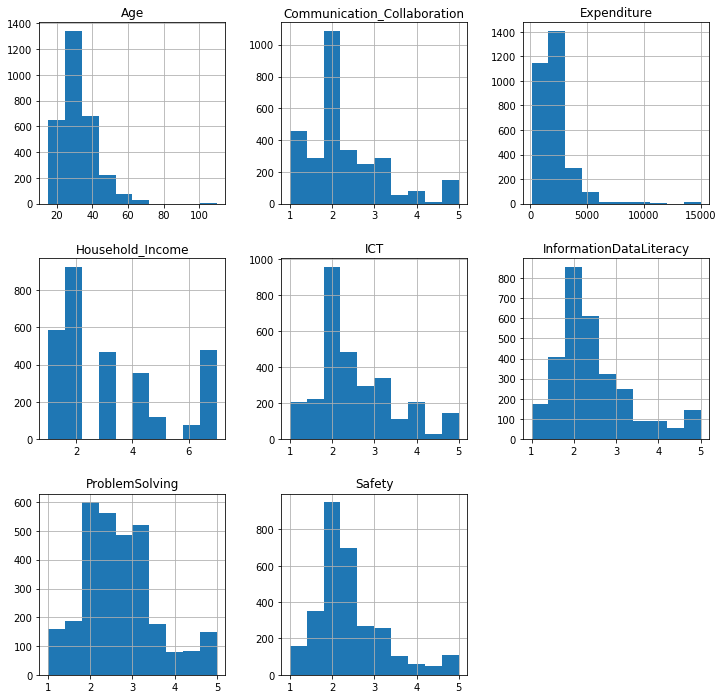

In [109]:
#Data Visualization
featured_data.hist(figsize =(12,12));

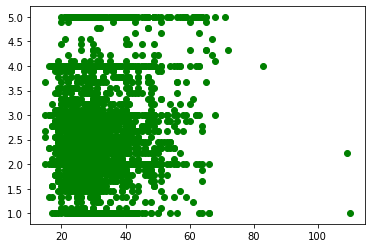

In [110]:
plt.scatter(data=featured_data,x='Age',y='ICT',color='g')
plt.xlabel='Age'
plt.ylabel='ICT'

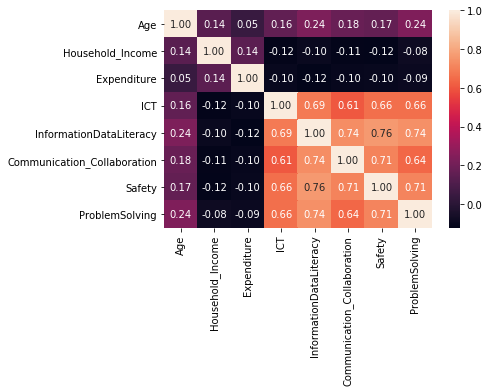

In [111]:
#Finding correlation between data
sns.heatmap(featured_data.corr(),annot=True,fmt=".2f");

In [112]:
#Dealing with complementary data
#import dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving SAyouth.xlsx to SAyouth (1).xlsx
User uploaded file "SAyouth.xlsx" with length 8365225 bytes


In [0]:
#convert excel primary data to csv file
data_xls = pd.read_excel('SAyouth.xlsx', index_col=None)
data_xls.to_csv('youth.csv', encoding='utf-8')

In [0]:
#read the csv file
youth_data=pd.read_csv('youth.csv')

In [115]:
youth_data.head()

,Unnamed: 0,uqno,personno,province,Q12Gender,q13age,Q14Population,Q15Mothaliv,Q16Mothparthh,Q17Fathaliv,Q18Fathparthh,Q19G_Parparthh,Q20SELFRESPOND,Q22Attend,Q23Eduinst,Q24AGE_GR1,Q25Miss_Day,Q26Miss_Rsn,Q27Daysabsent,Q28Everattend,Q29Whynot,Q210Age_Gr1,Q211Ageleft,Q212Whyleft,Q31APDWRK_LSTW,Q31ATIME_LSTW,Q31BBOWBUSNS_LSTW,Q31BTIME_LSTW,Q31CUNPDWRK_LSTW,Q31CTIME_LSTW,Q32APDWRK_YR,Q32BOWNBUSNS_YR,Q32CUNPDWRK_YR,Q33TIME_YR,Q34RSNWRK,Q35ALOOKWRK,Q35BSTARTBUSNS,Q36WHYWRK,Q41Occupation,Q42Industry,...,Q75BMAINTENANCE,Q75CGARDEN,q75dmark,Q75EHOUSE,q75fothr,q76time,Q77ADIF_CTCHUP,Q77BNOTIME,Q77CCONCENTRATE,Q77DPUNCTUAL,Q77ELEISURE,Q78ASUBCODE,Q78BSUBCODE,indus1,indus12,occup1,occup12,ParentAlive,memberh,GrandParent,EconomicAct1,EconomicAct12,EconMarket1,EconMarket12,C1_Market,C12_Market,hchores,study,work,Hrs_MarketAct,hrsmrkt,Hrs_NonMarketAct,HrsNonMrkt,TotalHours,totalhrs,LabCategory,geo_type,stratum,Metro_code,weight
0,0,101000170000011001,3,1,2,15,4,1,1,1,1,2,2,1,2,7,2,0,2,0,0,88,88,0,2,88,2,88,2,88,2,2,2,888,0,2,2,0,88888,8888,...,2,2,2,2,2,88,2,2,2,2,2,282,999,0,0,0,0,3,3,0,2,2,0,0,0,0,2,1,2,88,0,888,0,888,0,1,5,10150,0,362.120045
1,1,101000170000011001,4,1,1,12,4,1,1,1,1,2,9,1,2,7,2,0,1,0,0,88,88,0,2,88,2,88,2,88,2,2,2,888,0,2,2,0,88888,8888,...,2,2,2,2,2,88,2,2,2,2,2,282,999,0,0,0,0,3,3,0,2,2,0,0,0,0,1,1,2,88,0,888,0,888,0,4,5,10150,0,362.120045
2,2,101000170000011001,5,1,1,10,4,1,1,1,1,2,9,1,2,7,2,0,1,0,0,88,88,0,2,88,2,88,2,88,2,2,2,888,0,2,2,0,88888,8888,...,2,1,2,2,2,2,2,2,2,2,2,819,282,0,0,0,0,3,3,0,2,2,0,0,0,0,1,1,2,88,0,888,0,888,0,4,5,10150,0,362.120045
3,3,101000220000015801,3,1,2,16,4,1,1,1,1,2,1,1,2,7,2,0,2,0,0,88,88,0,2,88,2,88,2,88,2,2,2,888,0,2,2,0,88888,8888,...,2,2,2,2,2,88,2,2,2,2,2,999,230,0,0,0,0,3,3,0,2,2,0,0,0,0,1,1,2,88,0,888,0,888,0,4,1,10110,0,235.403312
4,4,101000220000026301,3,1,2,10,2,1,1,1,1,2,9,1,2,7,2,0,1,0,0,88,88,0,2,88,2,88,2,88,2,2,2,888,0,2,2,0,88888,8888,...,2,2,2,2,2,88,2,2,2,2,2,999,999,0,0,0,0,3,3,0,2,2,0,0,0,0,2,1,2,88,0,888,0,888,0,1,1,10110,0,535.065806


In [0]:
#Select and define featured data
featured_youth_data=youth_data[['study','work','Q12Gender']]

In [117]:
#read the first five featured youth data
featured_youth_data.head()

,study,work,Q12Gender
0,1,2,2
1,1,2,1
2,1,2,1
3,1,2,2
4,1,2,2


In [118]:
#Combine the Primary data and Complementary data
featured_data.join(featured_youth_data)

,Province,Municipality,Area,UrbanPeriUrbanRural,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,study,work,Q12Gender
0,Eastern Cape,Sundays River Valley,Kirkwood,Rural,31.0,1,600.0,5.000000,5.0,1.666667,2.714286,4.2,1,2,2
1,Eastern Cape,Sundays River Valley,Kirkwood,Rural,26.0,2,1200.0,2.222222,1.7,1.000000,1.714286,1.4,1,2,1
2,Eastern Cape,Sundays River Valley,Kirkwood,Rural,33.0,1,1500.0,3.000000,1.0,1.000000,1.000000,1.0,1,2,1
3,Eastern Cape,Sundays River Valley,Kirkwood,Rural,33.0,1,1500.0,3.777778,4.0,4.000000,2.571429,4.8,1,2,2
4,Eastern Cape,Sundays River Valley,Kirkwood,Rural,32.0,2,1500.0,4.000000,1.2,2.000000,4.428571,3.6,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Western Cape,City Of Cape Town,Cape Town,Urban,17.0,1,1500.0,4.000000,3.7,3.000000,3.285714,3.8,1,2,2
2996,Western Cape,City Of Cape Town,Cape Town,Urban,24.0,7,2000.0,4.000000,3.9,2.666667,3.142857,3.4,1,2,2
2997,Western Cape,City Of Cape Town,Cape Town,Urban,23.0,1,1500.0,2.777778,1.8,2.000000,2.714286,2.2,1,2,1
2998,Western Cape,Drakenstein,Paarl,Rural,66.0,2,2000.0,1.000000,1.3,1.000000,1.285714,1.0,2,2,1


In [0]:
combined_data=featured_data.join(featured_youth_data)

In [120]:
combined_data.isnull().sum()

Province                       0
Municipality                   0
Area                           0
UrbanPeriUrbanRural            0
Age                            0
Household_Income               0
Expenditure                    0
ICT                            0
InformationDataLiteracy        0
Communication_Collaboration    0
Safety                         0
ProblemSolving                 0
study                          0
work                           0
Q12Gender                      0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

In [122]:
num_col=combined_data._get_numeric_data().columns.tolist()
num_col

['Age',
 'Household_Income',
 'Expenditure',
 'ICT',
 'InformationDataLiteracy',
 'Communication_Collaboration',
 'Safety',
 'ProblemSolving',
 'study',
 'work',
 'Q12Gender']

In [123]:
cat_col=combined_data.select_dtypes(exclude=["number"])
cat_col

,Province,Municipality,Area,UrbanPeriUrbanRural
0,Eastern Cape,Sundays River Valley,Kirkwood,Rural
1,Eastern Cape,Sundays River Valley,Kirkwood,Rural
2,Eastern Cape,Sundays River Valley,Kirkwood,Rural
3,Eastern Cape,Sundays River Valley,Kirkwood,Rural
4,Eastern Cape,Sundays River Valley,Kirkwood,Rural
...,...,...,...,...
2995,Western Cape,City Of Cape Town,Cape Town,Urban
2996,Western Cape,City Of Cape Town,Cape Town,Urban
2997,Western Cape,City Of Cape Town,Cape Town,Urban
2998,Western Cape,Drakenstein,Paarl,Rural


In [0]:
for col in num_col:
    combined_data[col].fillna(combined_data[col].mean(),inplace=True)

In [0]:
for col in cat_col:
    combined_data[col].fillna(combined_data[col].mode(),inplace=True)

In [126]:
for i in cat_col:
    print(combined_data[i].value_counts())

Western Cape     500
Kwazulu Natal    500
Gauteng          499
Northwest        251
Northern Cape    250
Mpumalanga       250
Free State       250
Eastern Cape     250
Limpopo          250
Name: Province, dtype: int64
City of Joburg          450
City Of Cape Town       400
Mbombela                250
eThekhwini              250
Emondlo                 250
Sol-Plaatjie            225
Mangaung                200
Makhado                 174
Greater Taung           150
Sundays River Valley    125
Nelson Mandela Bay      125
Drakenstein             100
Rustenburg               76
Capricorn                51
Manstopa                 50
Sedibeng                 49
Madibeng                 25
Ga-Segonyana             25
Thulamela                25
Name: Municipality, dtype: int64
Cape Town         350
Johannesburg      310
eMondlo           250
Kimberley         175
Tshakhuma         174
Taung             150
Durban            150
Bloemfontein      150
Kirkwood          125
Kanyamazane       1

In [0]:
combined_data=combined_data.drop(["Province","Municipality","Area","UrbanPeriUrbanRural"],axis=1)

In [128]:
X=pd.get_dummies(combined_data)
X.shape

(3000, 11)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scalerX =MinMaxScaler(feature_range=(0, 1))
X[X.columns]=scalerX.fit(X[X.columns])

In [130]:
combined_data.head()

,Age,Household_Income,Expenditure,ICT,InformationDataLiteracy,Communication_Collaboration,Safety,ProblemSolving,study,work,Q12Gender
0,31.0,1,600.0,5.000000,5.0,1.666667,2.714286,4.2,1,2,2
1,26.0,2,1200.0,2.222222,1.7,1.000000,1.714286,1.4,1,2,1
2,33.0,1,1500.0,3.000000,1.0,1.000000,1.000000,1.0,1,2,1
3,33.0,1,1500.0,3.777778,4.0,4.000000,2.571429,4.8,1,2,2
4,32.0,2,1500.0,4.000000,1.2,2.000000,4.428571,3.6,1,2,2


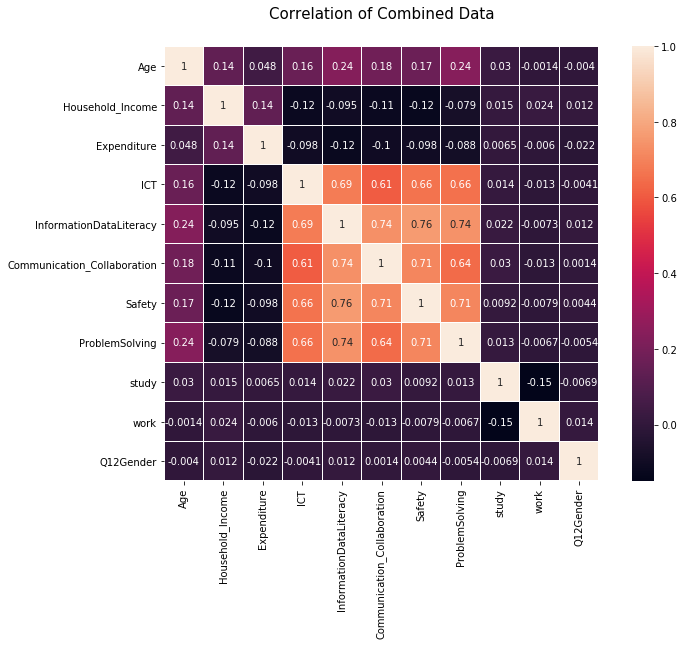

In [131]:
plt.figure(figsize=(12,8))
plt.title('Correlation of Combined Data',y=1.05,size=15)
sns.heatmap(combined_data.corr(), linewidths=0.1 ,vmax=1.0,square=True,linecolor='white',annot=True)

In [0]:
#Model Building
from sklearn import model_selection
from sklearn.metrics import classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [134]:
print('Shape of Combined data:',combined_data.shape)

Shape of Combined data: (3000, 11)


In [136]:
combined_data.to_csv (r'C:\Users\karab\Desktop\data.csv', index = False, header=True)

print (combined_data)

       Age  Household_Income  Expenditure  ...  study  work  Q12Gender
0     31.0                 1        600.0  ...      1     2          2
1     26.0                 2       1200.0  ...      1     2          1
2     33.0                 1       1500.0  ...      1     2          1
3     33.0                 1       1500.0  ...      1     2          2
4     32.0                 2       1500.0  ...      1     2          2
...    ...               ...          ...  ...    ...   ...        ...
2995  17.0                 1       1500.0  ...      1     2          2
2996  24.0                 7       2000.0  ...      1     2          2
2997  23.0                 1       1500.0  ...      1     2          1
2998  66.0                 2       2000.0  ...      2     2          1
2999  20.0                 1       1000.0  ...      1     2          1

[3000 rows x 11 columns]
